In [1]:
import numpy as np
import pandas as pd
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
from sklearn.mixture import GaussianMixture
from sklearn.metrics import adjusted_rand_score, silhouette_score
import matplotlib.pyplot as plt
import seaborn as sns

iris = datasets.load_iris()
X = iris.data
y_true = iris.target

In [3]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

gmm = GaussianMixture(n_components=3, random_state=42)
gmm.fit(X_scaled)

y_gmm = gmm.predict(X_scaled)

c:\Users\Bluepal\anaconda3\envs\python_course\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [4]:
silhouette = silhouette_score(X_scaled, y_gmm)
ari = adjusted_rand_score(y_true, y_gmm)
inertia_like = -gmm.score(X_scaled) * len(X_scaled)  

print(f"Approximate 'Inertia': {inertia_like:.2f}")
print(f"Silhouette Score: {silhouette:.2f}")
print(f"Adjusted Rand Index (vs true labels): {ari:.2f}")

Approximate 'Inertia': 310.36
Silhouette Score: 0.48
Adjusted Rand Index (vs true labels): 0.52


In [5]:
probs = gmm.predict_proba(X_scaled)
print("\nCluster Membership Probabilities (first 5 rows):")
print(pd.DataFrame(probs[:5], columns=[f"Cluster_{i}" for i in range(3)]))


Cluster Membership Probabilities (first 5 rows):
      Cluster_0  Cluster_1      Cluster_2
0  2.745034e-11        1.0   0.000000e+00
1  1.160331e-07        1.0   0.000000e+00
2  9.729214e-09        1.0  5.881680e-278
3  2.021935e-07        1.0  3.331737e-141
4  9.677759e-12        1.0   0.000000e+00


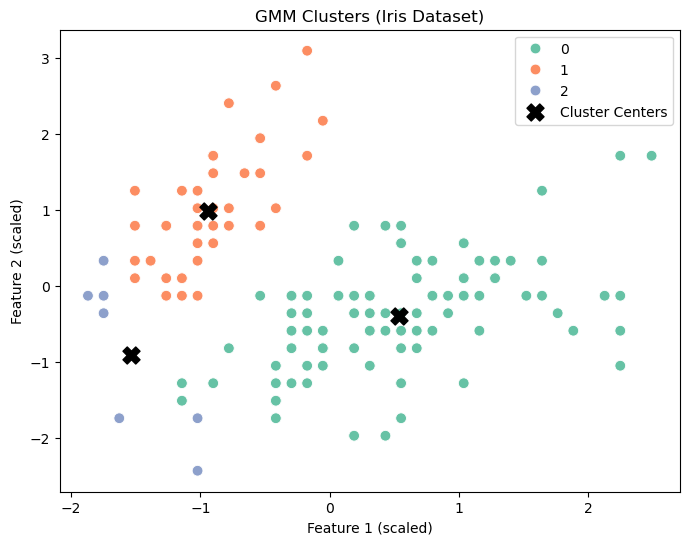

In [6]:
plt.figure(figsize=(8,6))
sns.scatterplot(x=X_scaled[:,0], y=X_scaled[:,1], hue=y_gmm, palette='Set2', s=60)
plt.title("GMM Clusters (Iris Dataset)")
plt.xlabel("Feature 1 (scaled)")
plt.ylabel("Feature 2 (scaled)")

centers = gmm.means_
plt.scatter(centers[:,0], centers[:,1], c='black', s=150, marker='X', label='Cluster Centers')
plt.legend()
plt.show()